In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [6]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

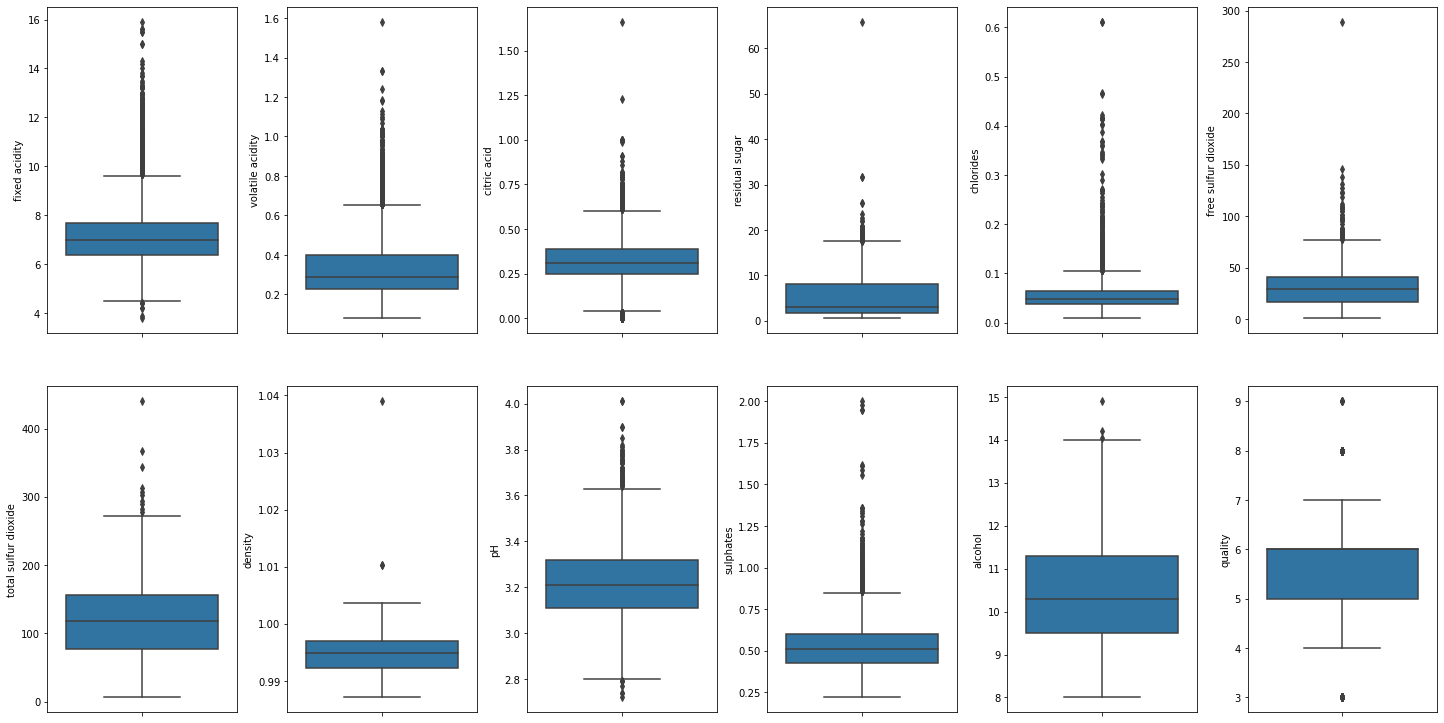

In [7]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

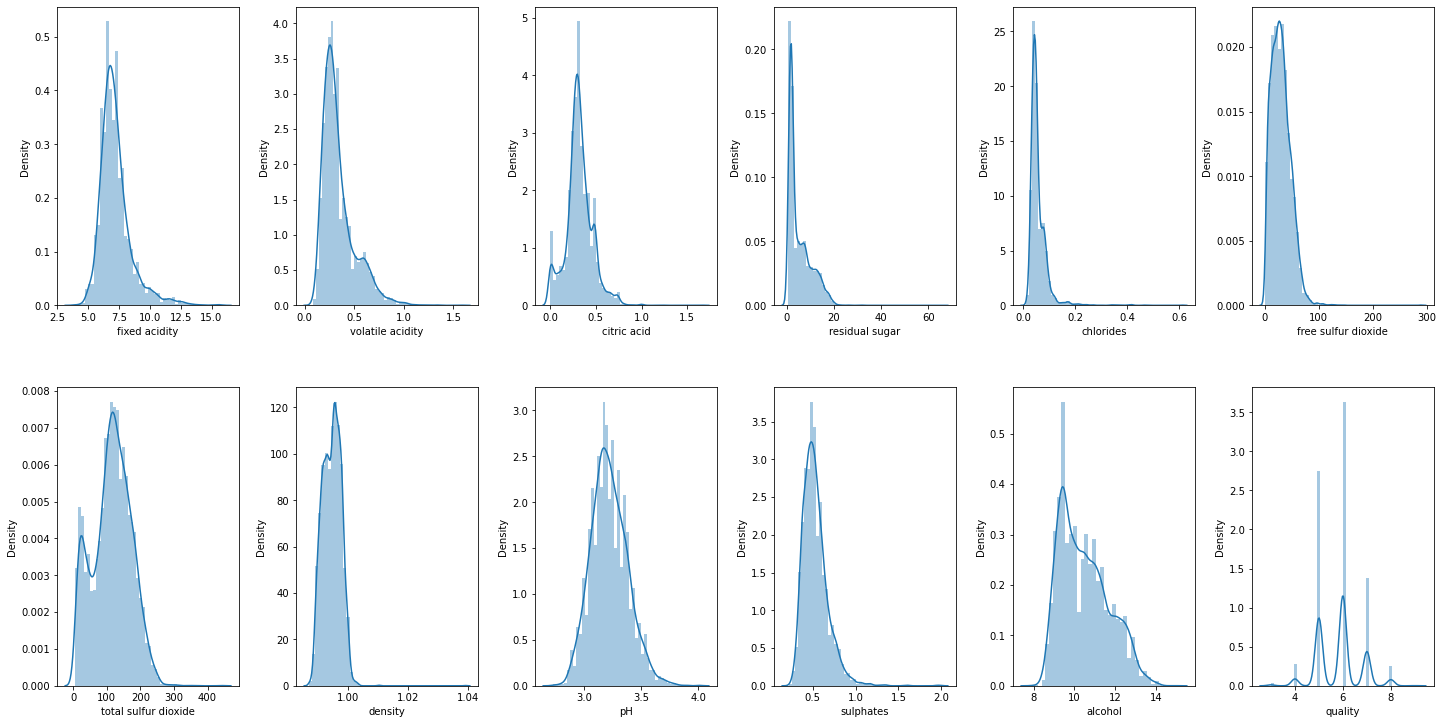

In [8]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='quality', ylabel='count'>

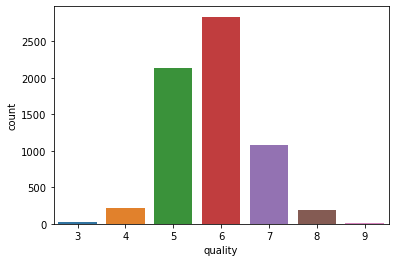

In [9]:
sns.countplot(x='quality',data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

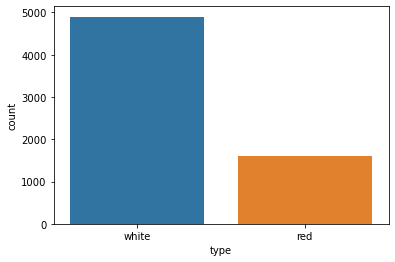

In [10]:
sns.countplot(x='type',data=df)

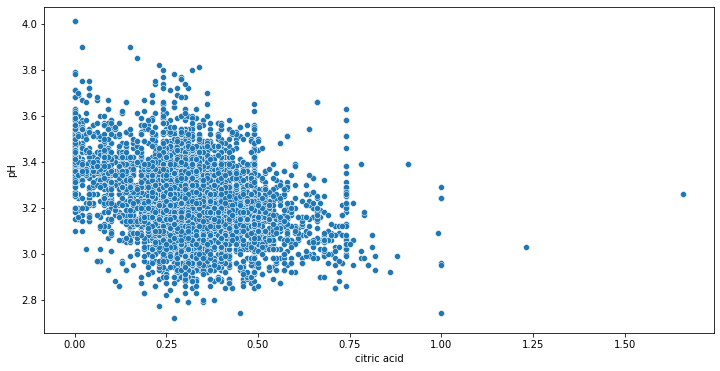

In [11]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

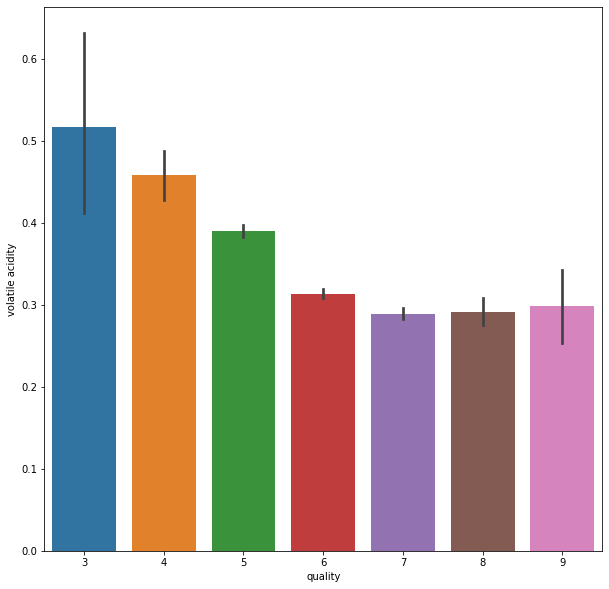

In [12]:
plot = plt.figure(figsize=(10,10))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

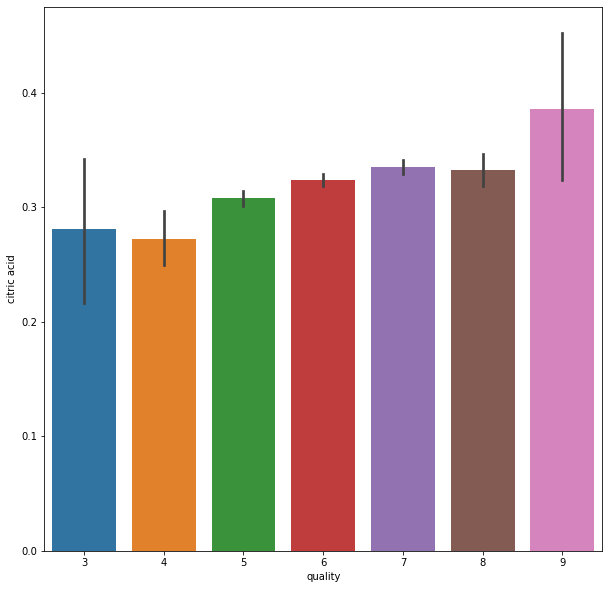

In [13]:
# citric acid vs Quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x='quality', y = 'citric acid', data = df)

# Coorelation Matrix

<AxesSubplot:>

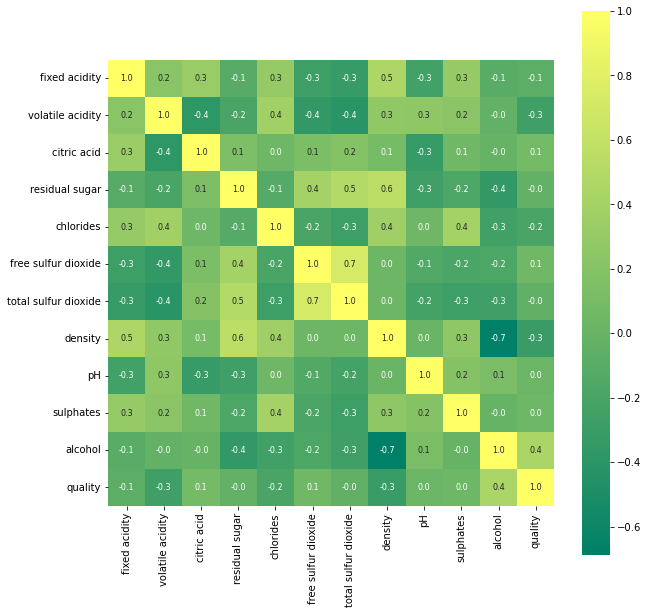

In [14]:
correlation = df.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'summer')

In [15]:
# separate the data and Label
X = df.drop(['type','quality'],axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


# Model Building without balancing classes

In [16]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [17]:
Y.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [18]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    # train the model
    model.fit(X_train, Y_train)
    print("Accuracy:", model.score(X_test, Y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, Y, cv=5)
    print("CV Score:", np.mean(score)*100)

### Logistic Regression withoutRandom Oversampling

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy: 81.35384615384615
CV Score: 80.3291881328833


### Decision Tree without Random Oversampling

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy: 83.2
CV Score: 77.15833481376207


### Random Forest without Random Oversampling

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy: 88.92307692307693
CV Score: 81.97596968081957


### Extra Tree with Random Oversampling

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, Y)

Accuracy: 89.16923076923077
CV Score: 82.05310593948008


### Wine Prediction

In [23]:
a=input("Enter fixed acidity: ")
b=input("volatile acidity: ")
c=input("citric acid: ")
d=input("residual sugar: ")
e=input("chlorides: ")
f=input("free sulfur dioxide: ")
g=input("total sulfur dioxide : ")
h=input("density: ")
i=input("pH: ")
j=input("sulphates: ")
k=input("alcohol: ")
input_data =(a,b,c,d,e,f,g,h,i,j,k)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Enter fixed acidity: 8
volatile acidity: 0.5
citric acid: 0.35
residual sugar: 6
chlorides: 0.07
free sulfur dioxide: 18
total sulfur dioxide : 100
density: 0.999
pH: 3.4
sulphates: 0.8
alcohol: 10.7
[0]
Bad Quality Wine


# Model Building with balancing classes

In [24]:
y=df['quality']
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [25]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [27]:
y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

In [28]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(X_train, y_train)
    print("Accuracy:", model.score(X_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

### Logistic Regression with Random Oversampling

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 32.742292967962925
CV Score: 30.84313793897444


### Decision Tree with Random Oversampling

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 81.62401773121097
CV Score: 74.97488529876873


### Random Forest with Random Oversampling

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 88.55530928873665
CV Score: 82.550923667623


### Extra Trees with Random Oversampling

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 89.60306266371147
CV Score: 83.36697099310048


In [33]:
print(y.shape, y_train.shape, y_test.shape)

(19852,) (14889,) (4963,)


### Predicting Wine Quality

In [34]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]>=7):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[5]
Bad Quality Wine


In [35]:
input_data = (6.8,0.26,0.42,1.7,0.049,41,122,0.993,3.47,0.48,10.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]>=7):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[8]
Good Quality Wine


In [36]:
a=input("Enter fixed acidity: ")
b=input("volatile acidity: ")
c=input("citric acid: ")
d=input("residual sugar: ")
e=input("chlorides: ")
f=input("free sulfur dioxide: ")
g=input("total sulfur dioxide : ")
h=input("density: ")
i=input("pH: ")
j=input("sulphates: ")
k=input("alcohol: ")
input_data =(a,b,c,d,e,f,g,h,i,j,k)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]>=7):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')
7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5

Enter fixed acidity: 8
volatile acidity: 0.5
citric acid: 0.35
residual sugar: 6
chlorides: 0.08
free sulfur dioxide: 18
total sulfur dioxide : 102
density: 0.999
pH: 3.36
sulphates: 0.8
alcohol: 10.5
[5]
Bad Quality Wine
